# Imports

In [13]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Prepare and preview the dataset

In [14]:
def generate_data(m):
    '''plots m random points on a 3D plane'''

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)

    return data

<ipython-input-15-fc3a50acc110>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X_train[:,0],X_train[:,1],X_train[:,2],cmap = 'Reds');


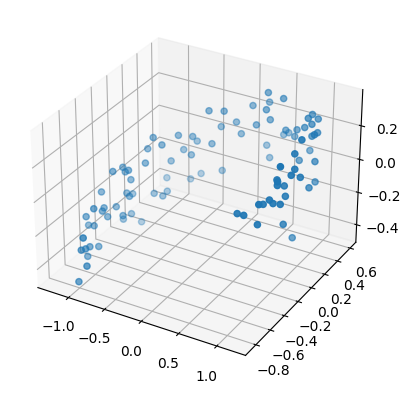

In [15]:
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis = 0,keepdims = 0)

# Preview the data
ax = plt.axes(projection = '3d')
ax.scatter3D(X_train[:,0],X_train[:,1],X_train[:,2],cmap = 'Reds');

# Build the Model

In [16]:
encoder = keras.models.Sequential([keras.layers.Dense(2,input_shape = [3])])
decoder = keras.models.Sequential([keras.layers.Dense(3,input_shape = [2])])

autoencoder = keras.models.Sequential([encoder,decoder])

# Compile the Model

In [17]:
autoencoder.compile(
    loss = 'mse',
    optimizer = keras.optimizers.SGD(lr = 0.1)
)

# Train the Model

In [ ]:
history = autoencoder.fit(
    X_train,
    X_train,
    epochs = 200
)

Epoch 1/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3241
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3154
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3084
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.3011
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2938
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2870
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2805
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2746
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2683
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2622
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2561
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2510
Epoch 13/200
4/4 [==============================] - 0s 8ms/st

# Plot the encoder output

In [ ]:
# Encode the data
codings = encoder.predict(X_train)

# see a sample input-encoder output pair
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

In [ ]:
# plot all encoder outputs
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# Plot the Decoder Output

In [ ]:
decodings = decoder.predict(codings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

In [ ]:
# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');